# Linear Regression

In [1]:
import sys
import math
import numpy as np
import pandas as pd
from sklearn import datasets, metrics

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn-whitegrid')
sns.set_theme(style="white")

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))

Python version: 3.12.9 | packaged by conda-forge | (main, Mar  4 2025, 22:44:42) [Clang 18.1.8 ]
NumPy version: 2.1.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


In [2]:
X, y = datasets.make_regression(
    n_samples=101, n_features=1, noise=15, random_state=4
)

In [3]:
X.shape, y.shape

((101, 1), (101,))

In [4]:
# df = pd.DataFrame({'X': X[:,0], 'Y': y})
# df.head()

Text(0, 0.5, 'Y')

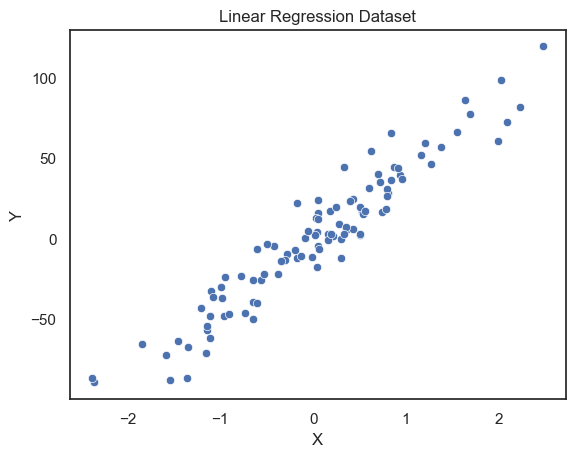

In [5]:
sns.scatterplot(x=X[:,0], y=y)
plt.title("Linear Regression Dataset")
plt.xlabel("X")
plt.ylabel("Y")

In [6]:
def mean_squared_error(X, y, w, b):
    n_samples, _ = X.shape
    return np.sum(np.power(y - (np.dot(X, w) + b), 2)) / n_samples


In [7]:
w = np.random.rand(X.shape[1])
b = 0
y_pred = np.dot(X, w) + b
print(y_pred.shape)
print(w, b)
print(metrics.mean_squared_error(y, y_pred))
print(mean_squared_error(X, y, w, b))

(101,)
[0.01423546] 0
1861.1103922201025
1861.1103922201025


## Loss Function for Linear Regression
$$ \text{MSE} = \frac{ \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 }{N} $$

Because $ \hat{y}_i $ or `y_pred` is determined by the line `m * x + c` (where we are using weights $ w $ to determine the slope, and bias $ b $ for the intercept), our equation becomes

$$ \text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i - (wx_i + b))^2 $$

For Gradient Descent, we need to differentiate this loss function w.r.t $ w $ and $ b $.
$$ \frac{d}{dw} = \frac{1}{N}\sum_{i=1}^{N} -2 x_i(y_i - (wx_i + b)) $$

$$ \Rightarrow \frac{d}{dw} = \frac{1}{N}\sum_{i=1}^{N} 2 x_i((wx_i + b) - y_i) $$

$$ \frac{d}{db} = \frac{1}{N}\sum_{i=1}^{N} -2 \cdot 1 \cdot (y_i - (wx_i + b)) $$

$$ \Rightarrow \frac{d}{db} = \frac{1}{N}\sum_{i=1}^{N} 2 ((wx_i + b) - y_i) $$

All we need to do is to move in the opposite direction of d/dw and d/db by the provided learning rate.

In [8]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0  # starting from the origin

        for _ in range(self.n_iters):
            # y = m * x + c
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Move in the opposite direction of the gradients, hence -ve of learning_rate * dw and db.
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def params(self):
        return {'weights': self.weights, 'bias': self.bias}

In [9]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

X_test = np.random.randint(low=-3, high=3, size=(10, 1))
y_pred = lin_reg.predict(X_test)
y_pred

array([  41.89601495,  -85.64498928,   -0.61765313,   84.40968302,
         -0.61765313,   84.40968302, -128.15865736,   84.40968302,
         84.40968302,   -0.61765313])

In [10]:
print(lin_reg.__dict__)

{'lr': 0.01, 'n_iters': 1000, 'weights': array([42.51366808]), 'bias': np.float64(-0.6176531273934909)}


In [11]:
y_pred = lin_reg.predict(X)
print(y_pred.shape)
print(metrics.mean_squared_error(y, y_pred))

(101,)
157.94518210548802


Text(0, 0.5, 'Y')

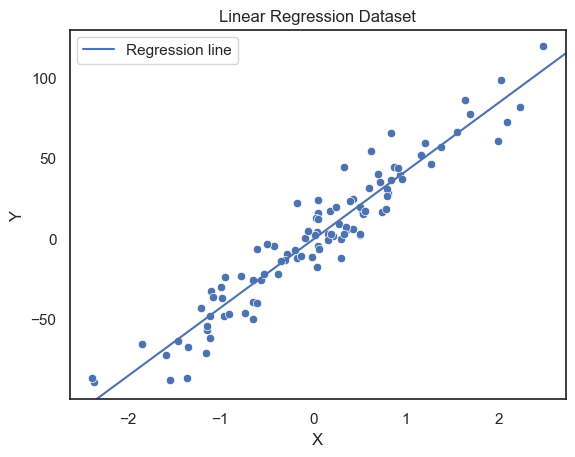

In [12]:
sns.scatterplot(x=X[:,0], y=y)
plt.axline((0, lin_reg.bias), slope=lin_reg.weights[0], color='C0', label='Regression line')
plt.title("Linear Regression Dataset")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

## Conclusion
We fit a line to the data.

If we had more features, as in the case of Multiple Regression, we would have fit a plane (in the case of 2 features) or a higher-dimensional object for higher-dimensional training data.

## References
1. Patrick Loeber's MLFromscratch https://github.com/patrickloeber/MLfromscratch
2. AssemblyAI's video on Implementing Linear Regression from scratch https://www.youtube.com/watch?v=ltXSoduiVwY
3. KD Nugget's Blog post on Linear Regression https://www.kdnuggets.com/linear-regression-from-scratch-with-numpy